In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, skew, kurtosis
import seaborn as sns


In [ ]:
# Load data
covariance_matrix = pd.read_excel('covariance_matrix.xlsx', index_col=0)
init_values = pd.read_excel('init_values.xlsx', index_col=0)

# Parameters
mu = np.array([0, 0.07 / 52, 0.06 / 52] + [0] * (len(covariance_matrix) - 3))
sigma = covariance_matrix.values
initial_values = init_values.values.flatten()
np.random.seed(55) #Den samme simulering



[0.         0.00134615 0.00115385 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [78]:
# Simulation settings
n_steps = 52  # Number of time steps (weekly for 1 year)
n_simulations = 10000  # Number of simulated paths
delta_t = 1 / 52  # Time step size
horizon = 1 

# Initialize matrix to store simulated paths
X_t = np.zeros((n_simulations, len(initial_values), n_steps + 1))
X_t[:, :, 0] = initial_values  # Initial values

# Simulate paths
for t in range(1, n_steps + 1):
    delta_X_t = np.random.multivariate_normal(mu * delta_t, sigma * delta_t, size=n_simulations)
    X_t[:, :, t] = X_t[:, :, t - 1] + delta_X_t


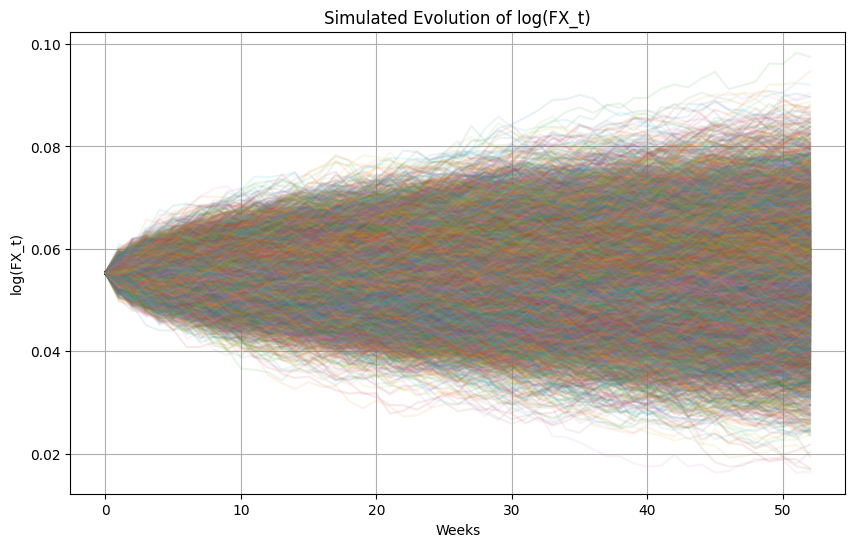

In [35]:
# Extract log(FX_t) (assuming it's the first element in X_t)
log_FX_t = X_t[:, 0, :]

# Visualization of log(FX_t)
plt.figure(figsize=(10, 6))
for i in range(n_simulations):  # Plot 10000 random paths
    plt.plot(range(n_steps + 1), log_FX_t[i, :], alpha=0.1)
plt.title("Simulated Evolution of log(FX_t)")
plt.xlabel("Weeks")
plt.ylabel("log(FX_t)")
plt.grid()
plt.show()


QUESTION 2: 
1. Obtain the distribution of V US,local
2. Again, simulate the the evolution of V US,local
3. Compare the simulated data with the true analytical distribution.

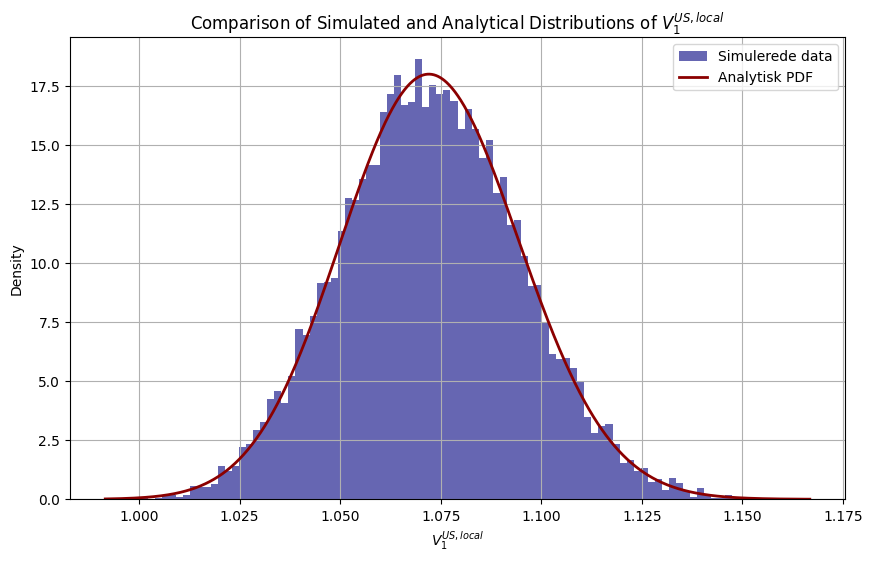

In [90]:
# --- Beregning af parametre til analytisk lognormal fordeling ---
V0_US_local = 1  # Startværdi for V_0^{US,local}
mu_log_annual = mu[1] * 52  # Årlig drift for log V_1^{US,local}
sigma_log_annual = np.sqrt(sigma[1, 1])  # Årlig volatilitet for log V_1^{US,local}

# --- Simuler log V_1^{US,local} med ugentlig drift og volatilitet ---
delta_t = 1 / 52  # Ugentlig tidshorisont
mu_log_weekly = mu[1]  # Ugentlig drift
sigma_log_weekly = np.sqrt(sigma[1, 1] * delta_t)  # Ugentlig volatilitet

# Analytisk log-normal distribution for V_1^{US,local}
scale = V0_US_local * np.exp(mu_log_annual)  # Scale-parameter for lognorm (justeret med V_0)
s = sigma_log_annual  # Standardafvigelse

# Simulering af V_1^{US,local}
n_simulations = 10000
log_V_US_local_1_simulated = np.random.normal(loc=mu_log_annual, scale=s, size=n_simulations)
V_US_local_1_simulated = V0_US_local * np.exp(log_V_US_local_1_simulated)  # Skalering med V_0

# Sammenligning mellem simulation og analytisk fordeling
x_values = np.linspace(min(V_US_local_1_simulated), max(V_US_local_1_simulated), 1000)  # Værdier til analytisk PDF
pdf_values = lognorm.pdf(x_values, s=s, scale=scale)

# Visualisering
plt.figure(figsize=(10, 6))

# Histogram for simulerede data
plt.hist(V_US_local_1_simulated, bins=100, density=True, color='navy', alpha=0.6, label='Simulerede data')

# Analytisk PDF
plt.plot(x_values, pdf_values, color='darkred', linewidth=2, label='Analytisk PDF')

# Titel og labels
plt.title("Comparison of Simulated and Analytical Distributions of $V_1^{US,local}$")
plt.xlabel("$V_1^{US,local}$")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


In [37]:
# Beregning af summary statistics for simuleringerne
sim_mean = np.mean(V_US_local_1_simulated)
sim_variance = np.var(V_US_local_1_simulated)
sim_median = np.median(V_US_local_1_simulated)
sim_std = np.std(V_US_local_1_simulated)
sim_skewness = skew(V_US_local_1_simulated)
sim_kurtosis = kurtosis(V_US_local_1_simulated)

# Analytisk forventning og varians for lognormal fordeling
analytical_mean = scale * np.exp((s**2) / 2)  # Forventet værdi af lognormal
analytical_variance = (scale**2) * (np.exp(s**2) - 1) * np.exp(s**2)  # Varians af lognormal

# Sammenligning af analytiske og simulerede resultater
print("Summary Statistics for Simulated V_1^{US,local}:")
print(f"Mean: {sim_mean:.4f} (Analytical: {analytical_mean:.4f})")
print(f"Variance: {sim_variance:.4f} (Analytical: {analytical_variance:.4f})")
print(f"Median: {sim_median:.4f}")
print(f"Standard Deviation: {sim_std:.4f}")
print(f"Skewness: {sim_skewness:.4f}")
print(f"Kurtosis: {sim_kurtosis:.4f}")


Summary Statistics for Simulated V_1^{US,local}:
Mean: 1.0727 (Analytical: 1.0727)
Variance: 0.0005 (Analytical: 0.0005)
Median: 1.0723
Standard Deviation: 0.0223
Skewness: 0.0634
Kurtosis: -0.0392


QUESTION 3
Explain how to calculate the value of a EUR or USD zero coupon bond based on the vector
of yields at a given point in time. What is the distribution of an initial 5 year zero coupon
at the horizon? Simulate the evolution of the initial 5 year zero coupon bond. Compare the
simulated data with the true analytical distribution.

0.0
0.0008511682809833435


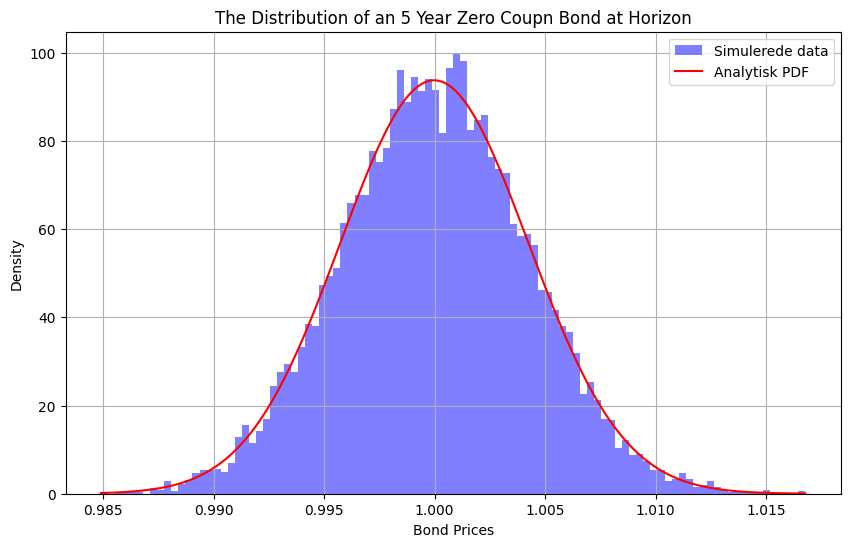

In [91]:
# Parametre for 5-årig zero-coupon obligation
tau = 5  # Løbetid
delta_t = 1 / 52  # Ugentlige trin

# Renter (antages at være elementer fra mu og sigma; juster indeks efter data)
mu_y = mu[4]  # Antag at mu[4] er driften for 5-årige renter
sigma_y = np.sqrt(sigma[6, 6])  # Varians for 5-årige renter

print(mu_y)
print(sigma_y)

# Beregning af analytisk fordeling af obligationens log-pris
mu_log_P = -tau * mu_y
sigma_log_P = tau * sigma_y

# Analytisk lognormal fordeling
scale = np.exp(mu_log_P)  # Scale-parameter for lognorm
s = sigma_log_P

# Simulering af obligationens log-pris
n_simulations = 10000
log_P_simulated = np.random.normal(loc=mu_log_P, scale=sigma_log_P, size=n_simulations)
P_simulated = np.exp(log_P_simulated)

# Analytisk PDF
x_values = np.linspace(P_simulated.min(), P_simulated.max(), 500)
pdf_values = lognorm.pdf(x_values, s=s, scale=scale)

# Visualisering
plt.figure(figsize=(10, 6))
plt.hist(P_simulated, bins=100, density=True, color='blue', alpha=0.5, label='Simulerede data')
plt.plot(x_values, pdf_values, color='red', label='Analytisk PDF')
plt.title("The Distribution of an 5 Year Zero Coupn Bond at Horizon")
plt.xlabel("Bond Prices")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


QUESTION 4: 
What is the joint distribution of the vector P1 = (FX1, V US,local1 , V EUR1 ,ZUSD 4Y,local 1 ,ZEUR 4Y1 )⊤?
Here ZUSD 4Y,local 1 denotes a 4 year USD zero coupon bond such the investor initially has bought a 5 year zero coupon bond.

In [75]:
np.random.seed(55) #Den samme simulering

# Extract relevant initial values
V0_US_local = 1
V0_EUR = 1

# Simulate market invariants
delta_X_1 = np.random.multivariate_normal(mean=mu * n_steps, cov=sigma * delta_t * n_steps, size=n_simulations)

# Extract relevant indices based on variable order
FX_1 = np.exp(delta_X_1[:, 0])  # FX rate
V_US_local_1 = np.exp(delta_X_1[:, 1])  # US equities
V_EUR_1 = np.exp(delta_X_1[:, 2])  # EUR equities

# Interpolation for 4-year EUR and USD yields
y_3Y_EUR = delta_X_1[:, 5]  # 3-year EUR yield
y_5Y_EUR = delta_X_1[:, 6]  # 5-year EUR yield
y_4Y_EUR = y_3Y_EUR + (1 / 2) * (y_5Y_EUR - y_3Y_EUR)

y_3Y_USD = delta_X_1[:, 11]  # 3-year USD yield
y_5Y_USD = delta_X_1[:, 12]  # 5-year USD yield
y_4Y_USD = y_3Y_USD + (1 / 2) * (y_5Y_USD - y_3Y_USD)

# Calculate bond prices
Z_EUR_4Y = np.exp(-y_4Y_EUR * 4)  # 4-year EUR bond
Z_USD_4Y_local = np.exp(-y_4Y_USD * 4)  # 4-year USD bond

# Combine into P1
P1 = np.c_[FX_1, V_US_local_1, V_EUR_1, Z_USD_4Y_local, Z_EUR_4Y_1]

# Calculate mean and covariance
P1_mean = P1.mean(axis=0)
P1_cov = np.cov(P1, rowvar=False)

# Print results
print("Mean of P1:\n", P1_mean)
print("Covariance matrix of P1:\n", P1_cov)


Mean of P1:
 [1.00007509 1.07264544 1.06192043 0.99995936 0.99997544]
Covariance matrix of P1:
 [[ 1.12937593e-04  4.28811287e-05 -2.58683711e-06  1.27096264e-05
   9.89413865e-06]
 [ 4.28811287e-05  4.97486625e-04  3.91744013e-04 -8.38556362e-06
  -8.50016848e-06]
 [-2.58683711e-06  3.91744013e-04  5.36285327e-04 -1.59496922e-05
  -1.48625128e-05]
 [ 1.27096264e-05 -8.38556362e-06 -1.59496922e-05  1.74562449e-05
   1.41294231e-05]
 [ 9.89413865e-06 -8.50016848e-06 -1.48625128e-05  1.41294231e-05
   1.29176371e-05]]


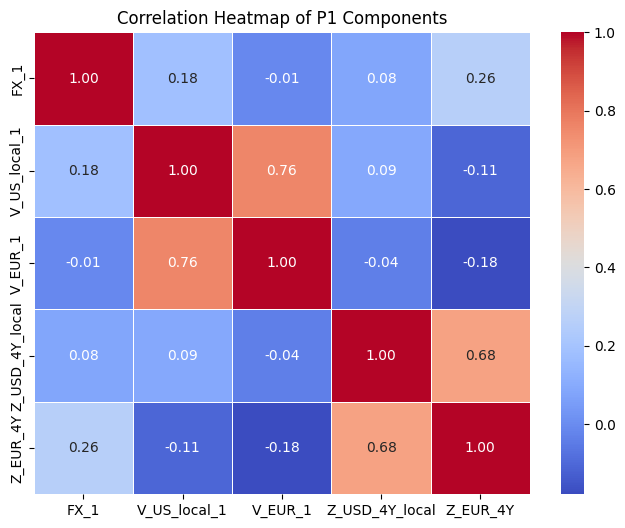

In [43]:
# Convert P1 to DataFrame for easier manipulation
P1_df = pd.DataFrame(P1, columns=["FX_1", "V_US_local_1", "V_EUR_1", "Z_USD_4Y_local", "Z_EUR_4Y"])

# Calculate the correlation matrix
correlation_matrix = P1_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of P1 Components")
plt.show()


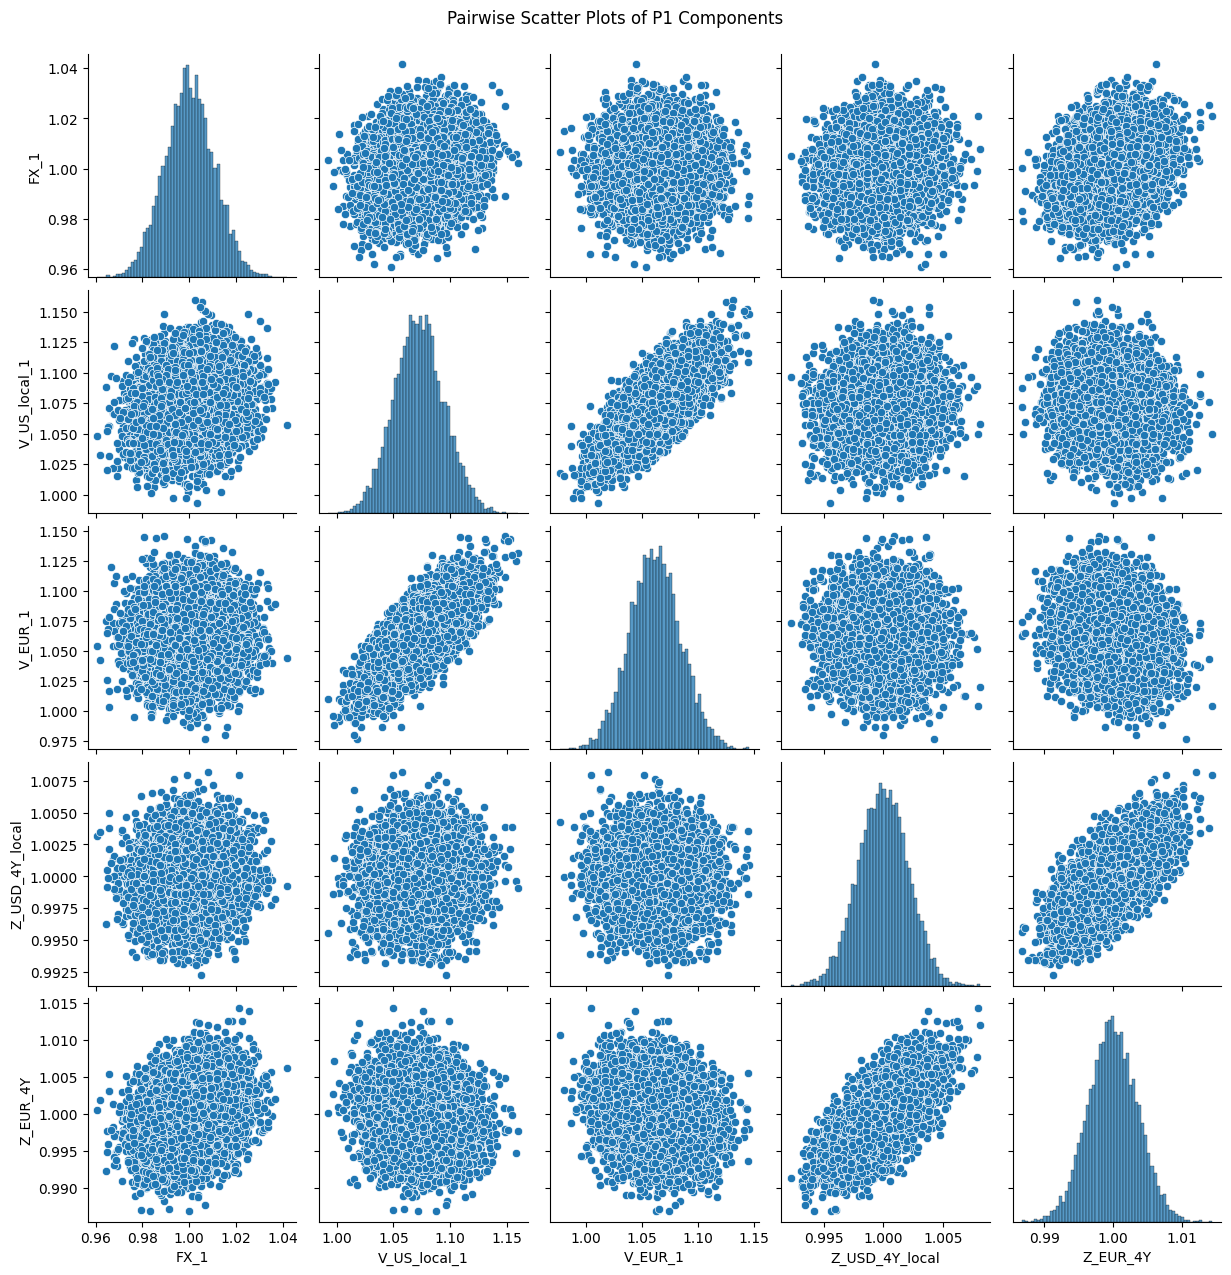

In [ ]:
import seaborn as sns
# Convert P1 to DataFrame for plotting
P1_df = pd.DataFrame(P1, columns=["FX_1", "V_US_local_1", "V_EUR_1", "Z_USD_4Y_local", "Z_EUR_4Y"])

# Pairplot for joint distribution
sns.pairplot(P1_df)
plt.suptitle("Pairwise Scatter Plots of P1 Components", y=1.02)
plt.show()


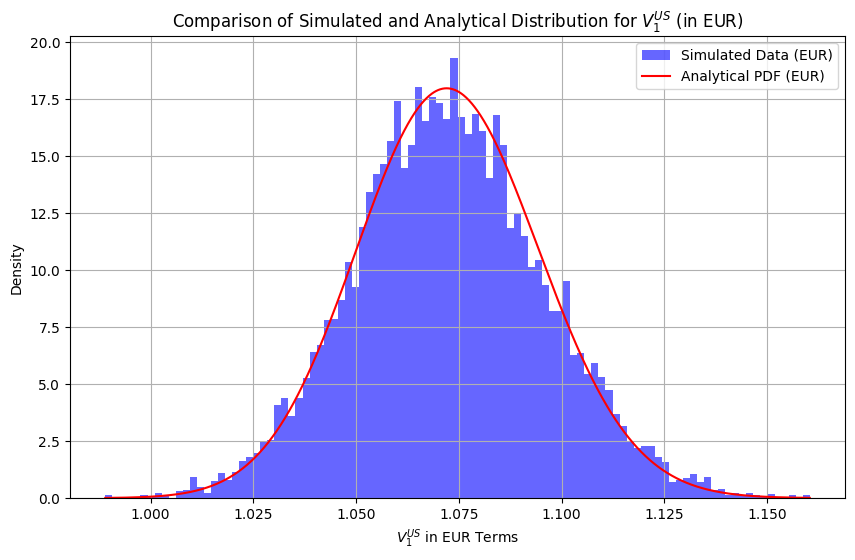

In [89]:
# Convert all components to EUR
FX_1_inv = 1 / FX_1  # Inverse of FX rate for conversion
V_US_1_EUR = V_US_local_1 * FX_1_inv  # US equity in EUR
Z_USD_4Y_1_EUR = Z_USD_4Y_local * FX_1_inv  # USD bond price in EUR

# Construct P1^EUR
P1_EUR = np.c_[FX_1_inv, V_US_1_EUR, V_EUR_1, Z_USD_4Y_1_EUR, Z_EUR_4Y_1]

# Analytical distribution for V_1^{US}
mu_log_V_US = mu[1]*52 
sigma_log_V_US = np.sqrt(sigma[1, 1])  
scale_in_eur = np.exp(mu_log_V_US) * np.exp(np.log(FX_1_inv).mean())
s = sigma_log_V_US  # Correct volatility


# Simulated data for V_1^{US}
x_values = np.linspace(min(V_US_1_EUR), max(V_US_1_EUR), 1000)
pdf_values = lognorm.pdf(x_values, s=s, scale=scale_in_eur)

# Visualize simulated vs analytical distribution for V_1^{US}
plt.figure(figsize=(10, 6))
plt.hist(V_US_1_EUR, bins=100, density=True, alpha=0.6, color="blue", label="Simulated Data (EUR)")
plt.plot(x_values, pdf_values, color="red", label="Analytical PDF (EUR)")
plt.title("Comparison of Simulated and Analytical Distribution for $V_1^{US}$ (in EUR)")
plt.xlabel("$V_1^{US}$ in EUR Terms")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()




Mean of P1^EUR:
 [1.00003784 1.07264313 1.06192043 1.00002866 0.99997544]
Covariance Matrix of P1^EUR:
 [[ 1.12981596e-04  7.82531133e-05  2.57894962e-06  1.11197259e-04
  -9.89506850e-06]
 [ 7.82531133e-05  5.35620934e-04  3.94584839e-04  8.06033132e-05
  -1.91037738e-05]
 [ 2.57894962e-06  3.94584839e-04  5.36285327e-04  7.17194301e-07
  -1.48625128e-05]
 [ 1.11197259e-04  8.06033132e-05  7.17194301e-07  1.13878942e-04
  -4.74721263e-06]
 [-9.89506850e-06 -1.91037738e-05 -1.48625128e-05 -4.74721263e-06
   1.29176371e-05]]


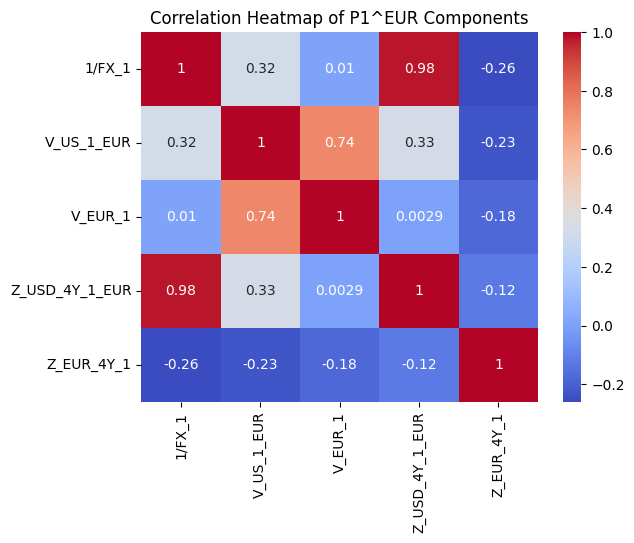

In [61]:
# Analyze P1^EUR
P1_EUR_mean = P1_EUR.mean(axis=0)
P1_EUR_cov = np.cov(P1_EUR, rowvar=False)

print("Mean of P1^EUR:\n", P1_EUR_mean)
print("Covariance Matrix of P1^EUR:\n", P1_EUR_cov)

# Correlation heatmap for P1^EUR
P1_EUR_df = pd.DataFrame(P1_EUR, columns=["1/FX_1", "V_US_1_EUR", "V_EUR_1", "Z_USD_4Y_1_EUR", "Z_EUR_4Y_1"])
sns.heatmap(P1_EUR_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of P1^EUR Components")
plt.show()